In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leemos el dataset

In [29]:
dataset = pd.read_csv('onmicron2.csv')
dataset

,Entity,Code,Day,Omicron_percentage
0,Argentina,ARG,11/29/2021,0.00
1,Aruba,ABW,11/29/2021,0.00
2,Australia,AUS,11/29/2021,0.40
3,Austria,AUT,11/29/2021,4.24
4,Bangladesh,BGD,11/29/2021,0.00
...,...,...,...,...
181,Belgium,BEL,1/5/2022,50.85
182,France,FRA,1/5/2022,80.34
183,Poland,POL,1/5/2022,11.29
184,United Kingdom,GBR,1/5/2022,95.91


In [24]:
indexDates = dataset[ (dataset['Entity'] != 'Argentina') & (dataset['Entity'] != 'Brazil') & (dataset['Entity'] != 'Chile') & (dataset['Entity'] != 'Colombia') & (dataset['Entity'] != 'Costa Rica') & (dataset['Entity'] != 'Ecuador') & (dataset['Entity'] != 'Mexico') & (dataset['Entity'] != 'Peru')].index
dataset.drop(indexDates, inplace = True)
dataset

,Entity,Code,Day,Omicron_percentage
0,Argentina,ARG,11/29/2021,0.00
8,Brazil,BRA,11/29/2021,0.16
13,Chile,CHL,11/29/2021,0.17
14,Colombia,COL,11/29/2021,0.00
15,Costa Rica,CRI,11/29/2021,0.00
19,Ecuador,ECU,11/29/2021,0.00
42,Mexico,MEX,11/29/2021,0.21
47,Peru,PER,11/29/2021,0.00
69,Argentina,ARG,12/13/2021,14.94
77,Brazil,BRA,12/13/2021,2.85


In [32]:
#dataset['Code'] = dataset['Code'].map({'ARG': 1, 'BRA': 2, 'CHL': 3, 'COL': 4, 'CRI': 5, 'ECU': 6,'MEX': 7, 'PER':8}, na_action=None)
dataset['Day'] = dataset['Day'].map({'11/29/2021': 1, '12/13/2021': 2, '12/27/2021': 3, '1/5/2022':4}, na_action=None)
dataset

,Entity,Code,Day,Omicron_percentage
0,Argentina,ARG,1,0.00
1,Aruba,ABW,1,0.00
2,Australia,AUS,1,0.40
3,Austria,AUT,1,4.24
4,Bangladesh,BGD,1,0.00
...,...,...,...,...
181,Belgium,BEL,4,50.85
182,France,FRA,4,80.34
183,Poland,POL,4,11.29
184,United Kingdom,GBR,4,95.91


Graficamos la data

In [33]:
X = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, 3:4].values

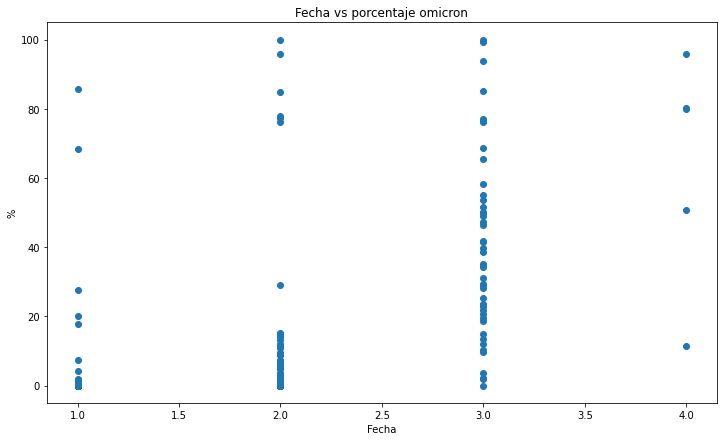

In [34]:
plt.figure(figsize=(12,7))
plt.scatter(X,y)
plt.title('Fecha vs porcentaje omicron')
plt.xlabel('Fecha')
plt.ylabel('%')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(148, 1)
(148, 1)
(38, 1)
(38, 1)


Implementamos el Algoritmo

In [36]:
#Se define el algoritmo a Utilizar
from sklearn import linear_model
lr = linear_model.LinearRegression()
#Se entrena el modelo
lr.fit(X_train, y_train)
#Predecimos los valores de Y de respecto a los valores de X
Y_pred = lr.predict(X_test)
print(Y_pred)

[[ 0.59214619]
 [ 0.59214619]
 [20.05186107]
 [20.05186107]
 [39.51157595]
 [39.51157595]
 [ 0.59214619]
 [39.51157595]
 [39.51157595]
 [39.51157595]
 [20.05186107]
 [20.05186107]
 [39.51157595]
 [ 0.59214619]
 [39.51157595]
 [ 0.59214619]
 [58.97129082]
 [20.05186107]
 [20.05186107]
 [20.05186107]
 [20.05186107]
 [58.97129082]
 [ 0.59214619]
 [20.05186107]
 [ 0.59214619]
 [39.51157595]
 [39.51157595]
 [ 0.59214619]
 [20.05186107]
 [ 0.59214619]
 [20.05186107]
 [39.51157595]
 [39.51157595]
 [ 0.59214619]
 [39.51157595]
 [ 0.59214619]
 [20.05186107]
 [20.05186107]]


In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
df

ValueError: ignored

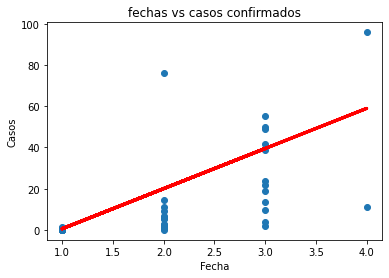

In [38]:
plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('fechas vs casos confirmados')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.show()

Hacemos la predicción

In [39]:
#Imprimirmos la precisión del modelo
print("Precisión del modelo")
print(lr.score(X_train, y_train))

Precisión del modelo
0.3413430170936598


NameError: ignored

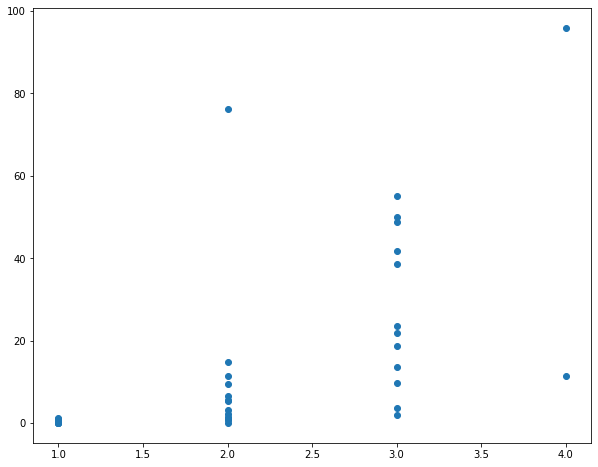

In [40]:
#Graficamos los datos junto con el modelo
plt.figure(figsize=(10,8))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title("Modelo de regresión lineal")
plt.xlabel("Minutos")
plt.ylabel('Score')
plt.show()